In [90]:
import pandas as pd
import numpy as np

df = open("C:/Users/pushp/Documents/Document.txt", 'r', encoding = 'ISO-8859-1')

df.read(1000)

'\n\nWiki Loves Monuments: Photograph a monument, help Wikipedia and win!\nLearn more\n\nThis is a featured article. Click here for more information. Extended-protected article\nIndia\nFrom Wikipedia, the free encyclopedia\nJump to navigationJump to search\nThis article is about the Republic of India. For other uses, see India (disambiguation).\n"Bharat" redirects here. For other uses, see Bharat (disambiguation).\nRepublic of India\nBh?rat Ga?ar?jya\n(see other local names)\nHorizontal tricolour flag bearing, from top to bottom, deep saffron, white, and green horizontal bands. In the centre of the white band is a navy-blue wheel with 24 spokes.\nFlag\nThree lions facing left, right, and toward viewer, atop a frieze containing a galloping horse, a 24-spoke wheel, and an elephant. Underneath is a motto: "??????? ????".\nState emblem\nMotto: "Satyameva Jayate" (Sanskrit)\n"Truth Alone Triumphs"[1]\nAnthem: "Jana Gana Mana"[2][3]\n"Thou Art the Ruler of the Minds of All People"[4][2]\nMEN

In [92]:
#Length of our text file

from pathlib import Path

txt = Path("C:/Users/pushp/Documents/Document.txt").read_text()
txt[: 100]

'\n\nWiki Loves Monuments: Photograph a monument, help Wikipedia and win!\nLearn more\n\nThis is a feature'

In [93]:
len(txt)

76626

In [46]:
import nltk
from nltk import word_tokenize, sent_tokenize

sentences = sent_tokenize(txt)

print(len(sentences))

479


In [50]:
words = word_tokenize(txt)
print(len(words))

15243


In [52]:
from nltk.probability import FreqDist

fdist = FreqDist(words)
fdist.most_common(10)

[(',', 922),
 ('the', 770),
 ('[', 522),
 (']', 522),
 ('.', 465),
 ('of', 460),
 ('and', 430),
 ('in', 306),
 ('India', 282),
 ('to', 202)]

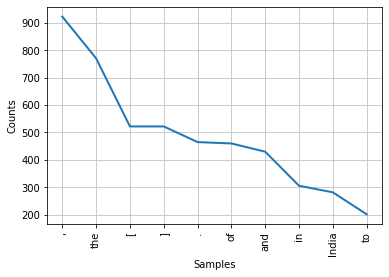

In [53]:
import matplotlib.pyplot as plt

fdist.plot(10)

In [55]:
empty = []

for word in words:
    if word.isalpha():
        empty.append(word.lower())

print(empty[:100])

['wiki', 'loves', 'monuments', 'photograph', 'a', 'monument', 'help', 'wikipedia', 'and', 'win', 'learn', 'more', 'this', 'is', 'a', 'featured', 'article', 'click', 'here', 'for', 'more', 'information', 'article', 'india', 'from', 'wikipedia', 'the', 'free', 'encyclopedia', 'jump', 'to', 'navigationjump', 'to', 'search', 'this', 'article', 'is', 'about', 'the', 'republic', 'of', 'india', 'for', 'other', 'uses', 'see', 'india', 'disambiguation', 'bharat', 'redirects', 'here', 'for', 'other', 'uses', 'see', 'bharat', 'disambiguation', 'republic', 'of', 'india', 'bh', 'rat', 'ga', 'ar', 'jya', 'see', 'other', 'local', 'names', 'horizontal', 'tricolour', 'flag', 'bearing', 'from', 'top', 'to', 'bottom', 'deep', 'saffron', 'white', 'and', 'green', 'horizontal', 'bands', 'in', 'the', 'centre', 'of', 'the', 'white', 'band', 'is', 'a', 'wheel', 'with', 'spokes', 'flag', 'three', 'lions', 'facing']


In [56]:
print(len(empty))

10815


In [57]:
fdist = FreqDist(empty)
fdist.most_common(10)

[('the', 875),
 ('of', 460),
 ('and', 430),
 ('in', 351),
 ('india', 282),
 ('a', 210),
 ('to', 203),
 ('by', 132),
 ('is', 113),
 ('indian', 99)]

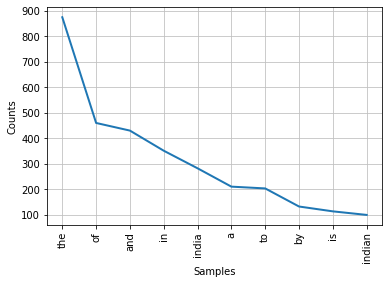

In [58]:
fdist.plot(10)

In [65]:
from nltk.corpus import stopwords

clean_words = []

stopwords = stopwords.words('english')
for i in empty:
    if i not in stopwords:
        clean_words.append(i)
        
print(clean_words[: 100])

['wiki', 'loves', 'monuments', 'photograph', 'monument', 'help', 'wikipedia', 'win', 'learn', 'featured', 'article', 'click', 'information', 'article', 'india', 'wikipedia', 'free', 'encyclopedia', 'jump', 'navigationjump', 'search', 'article', 'republic', 'india', 'uses', 'see', 'india', 'disambiguation', 'bharat', 'redirects', 'uses', 'see', 'bharat', 'disambiguation', 'republic', 'india', 'bh', 'rat', 'ga', 'ar', 'jya', 'see', 'local', 'names', 'horizontal', 'tricolour', 'flag', 'bearing', 'top', 'bottom', 'deep', 'saffron', 'white', 'green', 'horizontal', 'bands', 'centre', 'white', 'band', 'wheel', 'spokes', 'flag', 'three', 'lions', 'facing', 'left', 'right', 'toward', 'viewer', 'atop', 'frieze', 'containing', 'galloping', 'horse', 'wheel', 'elephant', 'underneath', 'motto', 'state', 'emblem', 'motto', 'satyameva', 'jayate', 'sanskrit', 'truth', 'alone', 'triumphs', 'anthem', 'jana', 'gana', 'mana', 'thou', 'art', 'ruler', 'minds', 'people', 'national', 'song', 'vande', 'mataram'

In [66]:
fdist = FreqDist(clean_words)

fdist.most_common(10)

[('india', 282),
 ('indian', 99),
 ('world', 38),
 ('south', 28),
 ('million', 25),
 ('government', 24),
 ('state', 22),
 ('population', 21),
 ('bce', 21),
 ('century', 20)]

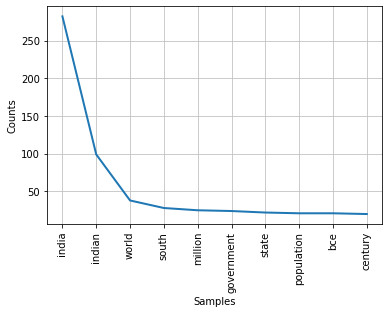

In [67]:
fdist.plot(10)

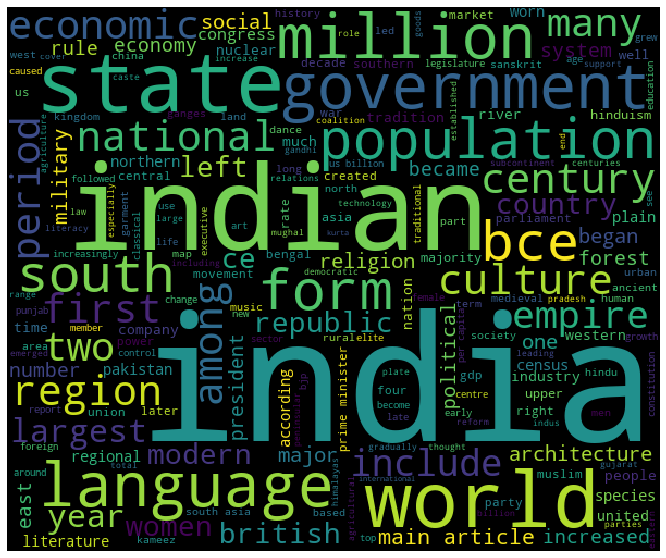

In [78]:
from wordcloud import WordCloud


new = ''

for val in clean_words:
    val = val.lower()
    new += val + ' '
    
wordc = WordCloud(width = 600, height = 500).generate(new)

plt.figure(figsize = (15,10))
plt.imshow(wordc)
plt.axis('off')
plt.show()

In [81]:
from nltk.stem import PorterStemmer, WordNetLemmatizer

porter = PorterStemmer()
wn = WordNetLemmatizer()

lem = [ ]
for word in new.split():
    temp = wn.lemmatize(word)
    lem.append(temp)
print(lem[: 50])

['wiki', 'love', 'monument', 'photograph', 'monument', 'help', 'wikipedia', 'win', 'learn', 'featured', 'article', 'click', 'information', 'article', 'india', 'wikipedia', 'free', 'encyclopedia', 'jump', 'navigationjump', 'search', 'article', 'republic', 'india', 'us', 'see', 'india', 'disambiguation', 'bharat', 'redirects', 'us', 'see', 'bharat', 'disambiguation', 'republic', 'india', 'bh', 'rat', 'ga', 'ar', 'jya', 'see', 'local', 'name', 'horizontal', 'tricolour', 'flag', 'bearing', 'top', 'bottom']


In [83]:
fdist = FreqDist(lem)

fdist.most_common(10)

[('india', 282),
 ('indian', 107),
 ('state', 40),
 ('world', 38),
 ('language', 30),
 ('south', 28),
 ('government', 27),
 ('century', 26),
 ('million', 26),
 ('population', 22)]

In [87]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

bag_of_words = cv.fit_transform(sentences)

print(cv.vocabulary_)

{'wiki': 3429, 'loves': 2083, 'monuments': 2238, 'photograph': 2498, 'monument': 2237, 'help': 1726, 'wikipedia': 3430, 'and': 641, 'win': 3435, 'learn': 2024, 'more': 2240, 'this': 3183, 'is': 1891, 'featured': 1508, 'article': 693, 'click': 994, 'here': 1733, 'for': 1564, 'information': 1855, 'extended': 1471, 'protected': 2603, 'india': 1829, 'from': 1598, 'the': 3169, 'free': 1594, 'encyclopedia': 1393, 'jump': 1932, 'to': 3212, 'navigationjump': 2301, 'search': 2854, 'about': 555, 'republic': 2742, 'of': 2369, 'other': 2408, 'uses': 3325, 'see': 2865, 'disambiguation': 1264, 'bharat': 809, 'redirects': 2686, 'bh': 806, 'rat': 2662, 'ga': 1611, 'ar': 667, 'jya': 1939, 'local': 2071, 'names': 2280, 'horizontal': 1765, 'tricolour': 3255, 'flag': 1539, 'bearing': 777, 'top': 3219, 'bottom': 852, 'deep': 1204, 'saffron': 2811, 'white': 3421, 'green': 1682, 'bands': 758, 'in': 1812, 'centre': 931, 'band': 756, 'navy': 2302, 'blue': 838, 'wheel': 3415, 'with': 3441, '24': 261, 'spokes': 

In [88]:
print(cv.get_feature_names())

['00', '000', '027', '03', '04', '05', '055', '094', '10', '100', '101', '1010', '102', '1022', '103', '104', '105', '106', '107', '108', '109', '10th', '11', '110', '111', '112', '113', '114', '115', '116', '117', '118', '118th', '119', '12', '120', '1200', '1206', '121', '122', '123', '124', '125', '126', '127', '128', '129', '129th', '13', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '1398', '139th', '13th', '14', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '14th', '15', '150', '1500', '151', '152', '1525', '1526', '153', '154', '155', '156', '157', '158', '159', '15th', '16', '160', '1605', '161', '162', '163', '1631', '164', '1648', '165', '166', '167', '168', '169', '16th', '17', '170', '1700', '171', '172', '173', '174', '175', '176', '1765', '1768', '177', '178', '179', '1795', '17th', '18', '180', '181', '182', '1820s', '183', '1835', '184', '1848', '185', '1857', '1858', '186', '187', '188', '1885', '189', '18th', '19', '190'

In [89]:
print(bag_of_words)

  (0, 3429)	1
  (0, 2083)	1
  (0, 2238)	1
  (0, 2498)	1
  (0, 2237)	1
  (0, 1726)	1
  (0, 3430)	1
  (0, 641)	1
  (0, 3435)	1
  (1, 2024)	1
  (1, 2240)	1
  (1, 3183)	1
  (1, 1891)	1
  (1, 1508)	1
  (1, 693)	1
  (2, 2240)	1
  (2, 994)	1
  (2, 1733)	1
  (2, 1564)	1
  (2, 1855)	1
  (3, 3430)	1
  (3, 3183)	1
  (3, 1891)	1
  (3, 693)	2
  (3, 1471)	1
  :	:
  (478, 3418)	1
  (478, 2687)	1
  (478, 2348)	1
  (478, 982)	1
  (478, 2573)	1
  (478, 2385)	1
  (478, 1618)	1
  (478, 2293)	1
  (478, 2869)	1
  (478, 1249)	1
  (478, 3400)	1
  (478, 1625)	1
  (478, 454)	2
  (478, 2870)	1
  (478, 3302)	1
  (478, 1762)	1
  (478, 1707)	1
  (478, 1956)	1
  (478, 621)	1
  (478, 863)	1
  (478, 2200)	1
  (478, 455)	1
  (478, 868)	1
  (478, 2068)	1
  (478, 3351)	1


---
---
---

In [94]:
import pandas as pd
import numpy as np
from pathlib import Path

# Reading file as text file

text = Path("C:/Users/pushp/Documents/Document.txt").read_text()

#Printing staring 1000 characters

print(text[: 1001])



Wiki Loves Monuments: Photograph a monument, help Wikipedia and win!
Learn more

This is a featured article. Click here for more information. Extended-protected article
India
From Wikipedia, the free encyclopedia
Jump to navigationJump to search
This article is about the Republic of India. For other uses, see India (disambiguation).
"Bharat" redirects here. For other uses, see Bharat (disambiguation).
Republic of India
Bh?rat Ga?ar?jya
(see other local names)
Horizontal tricolour flag bearing, from top to bottom, deep saffron, white, and green horizontal bands. In the centre of the white band is a navy-blue wheel with 24 spokes.
Flag
Three lions facing left, right, and toward viewer, atop a frieze containing a galloping horse, a 24-spoke wheel, and an elephant. Underneath is a motto: "??????? ????".
State emblem
Motto: "Satyameva Jayate" (Sanskrit)
"Truth Alone Triumphs"[1]
Anthem: "Jana Gana Mana"[2][3]
"Thou Art the Ruler of the Minds of All People"[4][2]
MENU0:00
National song
"Va

In [95]:
# Print len of the text file

len(text)

76626

In [98]:
import spacy

#load the English language model
nlp = spacy.load('en')

doc = nlp(text[:101])
doc



Wiki Loves Monuments: Photograph a monument, help Wikipedia and win!
Learn more

This is a featured

# Tokenizing ::

This returns a document object that contains tokens. A token is a unit of text in the document, such as individual words and punctuation. SpaCy splits contractions like "don't" into two tokens, "do" and "n't". You can see the tokens by iterating through the document.

In [99]:
for token in doc:
    print(token)




Wiki
Loves
Monuments
:
Photograph
a
monument
,
help
Wikipedia
and
win
!


Learn
more



This
is
a
featured
